# Before we start with the lesson: 

 we are going to clone the repository directly instead of forking it and then cloneing your own fork. I've been thinking about it and I think that this is going to be the easiest way to get updated materials. The process to doing this will be similar to loneing the fork. to do this: 
 
 1. Go to the cammlab github and click on the Intro to R for bench biologists repo
 
 2. Click on clone or download and copy the url
 
 3. Go to you terminal or gitbash (mac or win) 
 
 4. use `cd` and then the path of the directory that you want to down load the matals to. 
 
 5. type `git clone` and then paste the url
 
 6. type jupyter notebook to launch jupyter notebooks ( or use anaconda) and open this notebook called 'starting with data'

> ## Learning Objectives
> - Install and load packages
- Load external data from a .csv file into a data frame.
- Describe what a data frame is.
- Summarize the contents of a data frame.
- Use indexing to subset specific portions of data frames.
- Describe what a factor is.
- Convert between strings and factors.
- Reorder and rename factors.
- Change how character strings are handled in a data frame.

## Installing and loading packages 

Packages are self contained groups of functions that are generally created around a central goal or topic, qpcr analysis, cleaning data, package management, are all topics that have their own packages. 

**'Instaling'** packages using `install.packages()` downloads them from CRAN to your local machine and tells R where they are.  you only have to do this once. 

**'Loading'** packages using `library()` loads packages into your current session making them available to use. you have to do this every time you start a new session. 


In [ ]:
install.packages("tidyverse")



In [1]:
library(tidyverse)




Each Package has its own vingette wich is full of descriptions of functions, details about the inputs and outputs of the functions and usually helpfull examples.  I reccomend reading at least the relevant parts when you are first using a package. 

# Reading in a dataset to make a data frame

for read ing and writing manipulating and visualizing data we will be using the `tidyverse` package. Its an extremely diverse and usefull set of functions for data analysis. 

to read a csv file we use `read_csv()` and specify the file name (!! make sure it is in your working directory or specify the path to the file). you can also explicitly speicify the data type for each column. R will make these a data frame. 



## What are Data frames? 

Data frames are the _de facto_ data structure for most tabular data, and what we
use for statistics and plotting.

A data frame can be created by hand, but most commonly they are generated by the
functions `read.csv()` or `read.table()`; in other words, when importing
spreadsheets from your hard drive (or the web).

A data frame is the representation of data in the format of a table where the
columns are vectors that all have the same length. Because columns are
vectors, each column must contain a single type of data (e.g., characters, integers,
factors). For example, here is a figure depicting a data frame comprising a
numeric, a character, and a logical vector.

![](./img/data-frame.svg)

In [2]:
csv_luciferase <- read_csv(file = "luciferase_toy_data.csv", col_types = "cdfddcdcffl")
print(csv_luciferase)



# A tibble: 74 x 11
   Wells Signal Condition   Rep L_Concentration L_Units D_Concentration D_Units
   <chr>  <dbl> <fct>     <dbl>           <dbl> <chr>             <dbl> <chr>  
 1 C01    23768 D             1               0 uM                   10 uM     
 2 C10     4165 NO treat      1               0 uM                    0 uM     
 3 D01     5996 D             2               0 uM                   10 uM     
 4 D10    50004 NO treat      2               0 uM                    0 uM     
 5 E01     3559 D             3               0 uM                   10 uM     
 6 E10   327884 NO treat      3               0 uM                    0 uM     
 7 F01    43740 D             4               0 uM                   10 uM     
 8 F10    45499 NO treat      4               0 uM                    0 uM     
 9 G01     4641 D+L           1               1 nM                   10 uM     
10 G02     9140 D+L           2               1 nM                   10 uM     
# … with 64 more row

Often times full datasets are two large to see and we want to quickly inspect the first few or last few rows, we can use the `head` and `tail` functions to quickly inspect our data. 



In [6]:
# Content: try using head() and tail() to inspect the data 
head(csv_luciferase)

# Size: use * `dim()`,  `nrow()`,  `ncol()`  to return the dimensions, number of rows and number of columns. 
dim(csv_luciferase)
nrow(csv_luciferase)
ncol(csv_luciferase)

# Names:  use names() and rownames() to get the column and row names for the dataframe. 
names(csv_luciferase)
rownames(csv_luciferase)



Wells,Signal,Condition,Rep,L_Concentration,L_Units,D_Concentration,D_Units,Plate_ID,Exp_Date,TF_booster
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<fct>,<lgl>
C01,23768,D,1,0,uM,10,uM,BIC_luc,2017_10_13B,FALSE
C10,4165,NO treat,1,0,uM,0,uM,BIC_luc,2017_10_13B,FALSE
D01,5996,D,2,0,uM,10,uM,BIC_luc,2017_10_13B,FALSE
D10,50004,NO treat,2,0,uM,0,uM,BIC_luc,2017_10_13B,FALSE
E01,3559,D,3,0,uM,10,uM,BIC_luc,2017_10_13B,FALSE
E10,327884,NO treat,3,0,uM,0,uM,BIC_luc,2017_10_13B,FALSE


[1] 74 11

[1] 74

[1] 11

[1] "Wells"           "Signal"          "Condition"       "Rep"            
 [5] "L_Concentration" "L_Units"         "D_Concentration" "D_Units"        
 [9] "Plate_ID"        "Exp_Date"        "TF_booster"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54" "55" "56" "57" "58" "59" "60"
[61] "61" "62" "63" "64" "65" "66" "67" "68" "69" "70" "71" "72" "73" "74"

We need meaningful ways to quickly understand a large amount of data. We can see this when inspecting the <b>str</b>ucture of a data frame
with the function `str()`:

In [7]:
str(csv_luciferase)




Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	74 obs. of  11 variables:
 $ Wells          : chr  "C01" "C10" "D01" "D10" ...
 $ Signal         : num  23768 4165 5996 50004 3559 ...
 $ Condition      : Factor w/ 4 levels "D","NO treat",..: 1 2 1 2 1 2 1 2 3 3 ...
 $ Rep            : num  1 1 2 2 3 3 4 4 1 2 ...
 $ L_Concentration: num  0 0 0 0 0 0 0 0 1 1 ...
 $ L_Units        : chr  "uM" "uM" "uM" "uM" ...
 $ D_Concentration: num  10 0 10 0 10 0 10 0 10 10 ...
 $ D_Units        : chr  "uM" "uM" "uM" "uM" ...
 $ Plate_ID       : Factor w/ 2 levels "BIC_luc","ENZ_luc": 1 1 1 1 1 1 1 1 1 1 ...
 $ Exp_Date       : Factor w/ 4 levels "2017_10_13B",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TF_booster     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   Wells = col_character(),
  ..   Signal = col_double(),
  ..   Condition = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   Rep = col_double(),
  ..   L_Concentration = col_double(),
  

###  to get a summary of the values of a column use summary() for factors and characters
To inspect the columns and to understand what values we have and how many of each we can use the `table` function

In [8]:
summary(csv_luciferase)



    Wells               Signal          Condition       Rep       
 Length:74          Min.   :   251   D       :18   Min.   :1.000  
 Class :character   1st Qu.:  5167   NO treat:18   1st Qu.:2.000  
 Mode  :character   Median : 15775   D+L     :18   Median :3.000  
                    Mean   : 62594   L       :20   Mean   :2.959  
                    3rd Qu.: 48964                 3rd Qu.:4.000  
                    Max.   :454167                 Max.   :8.000  
 L_Concentration    L_Units          D_Concentration    D_Units         
 Min.   :0.0000   Length:74          Min.   : 0.000   Length:74         
 1st Qu.:0.0000   Class :character   1st Qu.: 0.000   Class :character  
 Median :1.0000   Mode  :character   Median :10.000   Mode  :character  
 Mean   :0.5946                      Mean   : 5.405                     
 3rd Qu.:1.0000                      3rd Qu.:10.000                     
 Max.   :1.0000                      Max.   :10.000                     
    Plate_ID        

Fornumerical columns, one can use `hist()` to make a quick and dirty histogram to get a sense of the disribution of the data. 

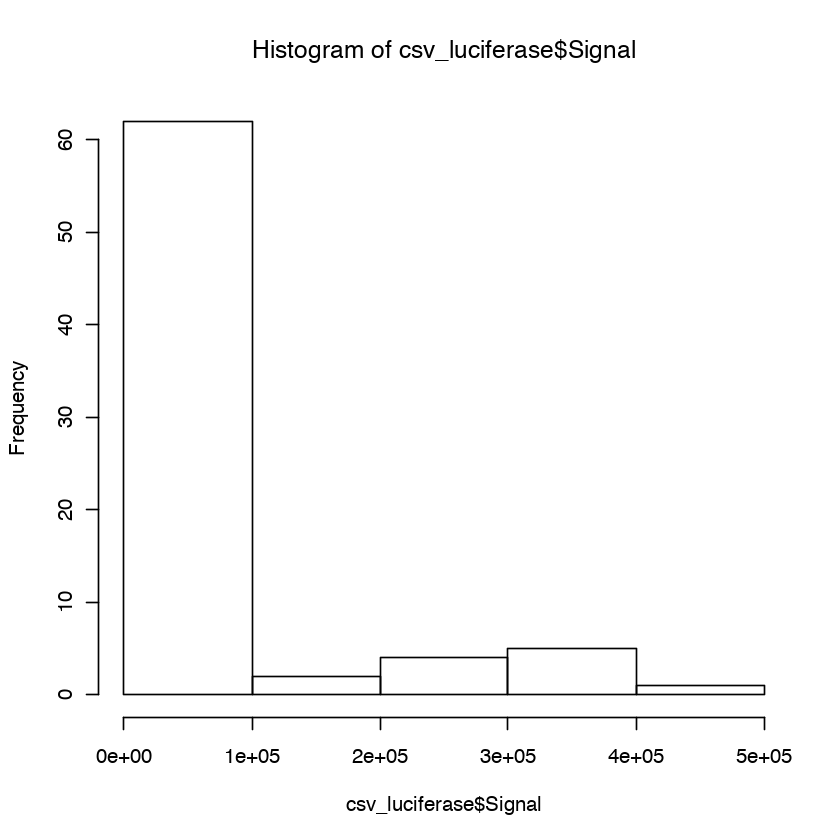

In [14]:
# use hist() with our luciferse data as one argument and set the argument 'breaks' = 20

hist(csv_luciferase$Signal, breaks = 10)




## Indexing and subsetting data frames

Our survey data frame has rows and columns (it has 2 dimensions), if we want to
extract some specific data from it, we need to specify the "coordinates" we
want from it. Row numbers come first, followed by column numbers. However, note
that different ways of specifying these coordinates lead to results with
different classes.



In [ ]:
# first element in the first column of the data frame (as a vector)
csv_luciferase[1, 1]   
# first element in the 6th column (as a vector)
csv_luciferase[1, 6]   
# first column of the data frame (as a vector)
csv_luciferase[, 1]    
# first column of the data frame (as a data.frame)
csv_luciferase[1]      
# first three elements in the 7th column (as a vector)
csv_luciferase[1:3, 7] 
# the 3rd row of the data frame (as a data.frame)
csv_luciferase[3, ]    



### Subsetting by calling column names directly

Column names can be used directly to inpect a whole column one at a time. The column name is referenced using the `$`.  if we wanted to only see the enitre `Condition` Column we could use `csv_luciferase$Condition`


In [ ]:
csv_luciferase$Condition

### Challenge

In [ ]:
 #1. Create a `data.frame` (`luciferase_200`) containing only the data in row 200 of the `csv_luciferase` dataset.



In [ ]:
 # 2. Notice how `nrow()` gave you the number of rows in a `data.frame`?

      # Use that number to pull out just that last row in the data frame.
      # Compare that with what you see as the last row using `tail()` to make
      # sure it's meeting expectations.
      # Pull out that last row using `nrow()` instead of the row number.
      # Create a new data frame (`surveys_last`) from that last row.


In [ ]:
 # 3. Use `nrow()` to extract the row that is in the middle of the data
    #frame. Store the content of this row in an object named `surveys_middle`.


In [ ]:
# 4. Combine `nrow()` with the `-` notation above to reproduce the behavior offset
#    `head(surveys)`, keeping just the first through 6th rows of the surveys
#    dataset.


## Factors

Factors represent categorical data. They are stored as integers associated with labels and they can be ordered or unordered. While factors look (and often behave) like character vectors, they are actually treated as integer vectors by R. So you need to be very careful when treating them as strings.

Once created, factors can only contain a pre-defined set of values, known as levels. By default, R always sorts levels in alphabetical order. For instance, if you have a factor with 2 levels:

In [10]:
plate <- csv_luciferase$Plate_ID
plate


[1] BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc
[10] BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc
[19] BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc
[28] BIC_luc BIC_luc BIC_luc BIC_luc BIC_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc
[37] ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc
[46] ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc
[55] ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc
[64] ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc ENZ_luc
[73] ENZ_luc ENZ_luc
Levels: BIC_luc ENZ_luc

R will assign 1 to the level "BIC_luc" and 2 to the level "ENZ_luc" (because B comes before E). You can see this by using the function levels() and you can find the number of levels using nlevels():

In [ ]:
# use the functions level() and nlevels() to examine the Plate_ID column



Sometimes, the order of the factors does not matter, other times you might want to specify the order because it is meaningful (e.g., “low”, “medium”, “high”), it improves your visualization, or it is required by a particular type of analysis. Here, one way to reorder our levels in the sex vector would be:

In [ ]:
plate



In [ ]:
plate  <- factor(plate, levels = c('ENZ_luc', 'BIC_luc'))
plate # after reordering

## viewing and Renaming factors

When your data is stored as a factor, you can use the plot() function to get a quick glance at the number of observations represented by each factor level. 

In [ ]:
plot(plate)

In [ ]:
# let's rename them to remove the "_luc" since its redundant 




In [ ]:
# plot to make sure its correct

